<a href="https://colab.research.google.com/github/han1159/Task_Kalvium_DA/blob/main/kalvium_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [148]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd


In [149]:
link = "https://results.eci.gov.in/PcResultGenJune2024/index.htm"
P_link = requests.get(link)
print(P_link)

P_html = P_link.text
P_soup = BeautifulSoup(P_html, "html.parser")

<Response [200]>


In [150]:
res_table1 = []
state_table = []
option_ele = P_soup.findAll("option")
values = {}
links = []
base_url = "https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-"
for option in option_ele:
  val = option.get("value")
  state = option.text
  if val:
    values[val] = state
for i in values:
  table = None
  state = values[i]
  full_link = f"{base_url}{i}.htm"
  ele_link = requests.get(full_link)
  ele_html = ele_link.content
  ele_soup = BeautifulSoup(ele_html, "html.parser")
  table = ele_soup.findAll("tr","class_" == "tr")
  constit = ele_soup.findAll("option")
  state_table.append([state,table,constit])
for i in range(len(state_table)):
  for tr in state_table[i][1]:
    if tr.find("td", {"style":"text-align:left"}) is not None:
      p_name = tr.find("td", {"style":"text-align:left"}).text
      won = tr.find("a").text
      # for k in state_table[i][2]:
      #   if k.get("value") != None and k.get("value").strip()!='SelectConstituency' and k.get("value")!= ' Select Constituency ':
      #     const_name = k.text
      #     if [state_table[i][0],const_name,p_name,won] not in res_table:
      if [state_table[i][0],p_name,won] not in res_table1:
        res_table1.append([state_table[i][0],p_name,won])
res_table1

#   containers = table[0].findAll("td",{"style" == "text-align:left"})
# print(containers)


[['Andaman & Nicobar Islands', 'Bharatiya Janata Party - BJP', '1'],
 ['Andhra Pradesh', 'Telugu Desam - TDP', '16'],
 ['Andhra Pradesh', 'Yuvajana Sramika Rythu Congress Party - YSRCP', '4'],
 ['Andhra Pradesh', 'Bharatiya Janata Party - BJP', '3'],
 ['Andhra Pradesh', 'Janasena Party - JnP', '2'],
 ['Arunachal Pradesh', 'Bharatiya Janata Party - BJP', '2'],
 ['Assam', 'Bharatiya Janata Party - BJP', '9'],
 ['Assam', 'Indian National Congress - INC', '3'],
 ['Assam', 'United People’s Party, Liberal - UPPL', '1'],
 ['Assam', 'Asom Gana Parishad - AGP', '1'],
 ['Bihar', 'Janata Dal  (United) - JD(U)', '12'],
 ['Bihar', 'Bharatiya Janata Party - BJP', '12'],
 ['Bihar', 'Lok Janshakti Party(Ram Vilas) - LJPRV', '5'],
 ['Bihar', 'Rashtriya Janata Dal - RJD', '4'],
 ['Bihar', 'Indian National Congress - INC', '3'],
 ['Bihar',
  'Communist Party of India  (Marxist-Leninist)  (Liberation) - CPI(ML)(L)',
  '2'],
 ['Bihar', 'Hindustani Awam Morcha (Secular) - HAMS', '1'],
 ['Bihar', 'Independen

In [151]:
df = pd.DataFrame(res_table1, columns = ['State', 'Party', 'Won'])
df.to_csv('statewise.csv')


<ipython-input-152-9b1919994a52>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Won', y='Party', data=party_seats, palette='viridis')


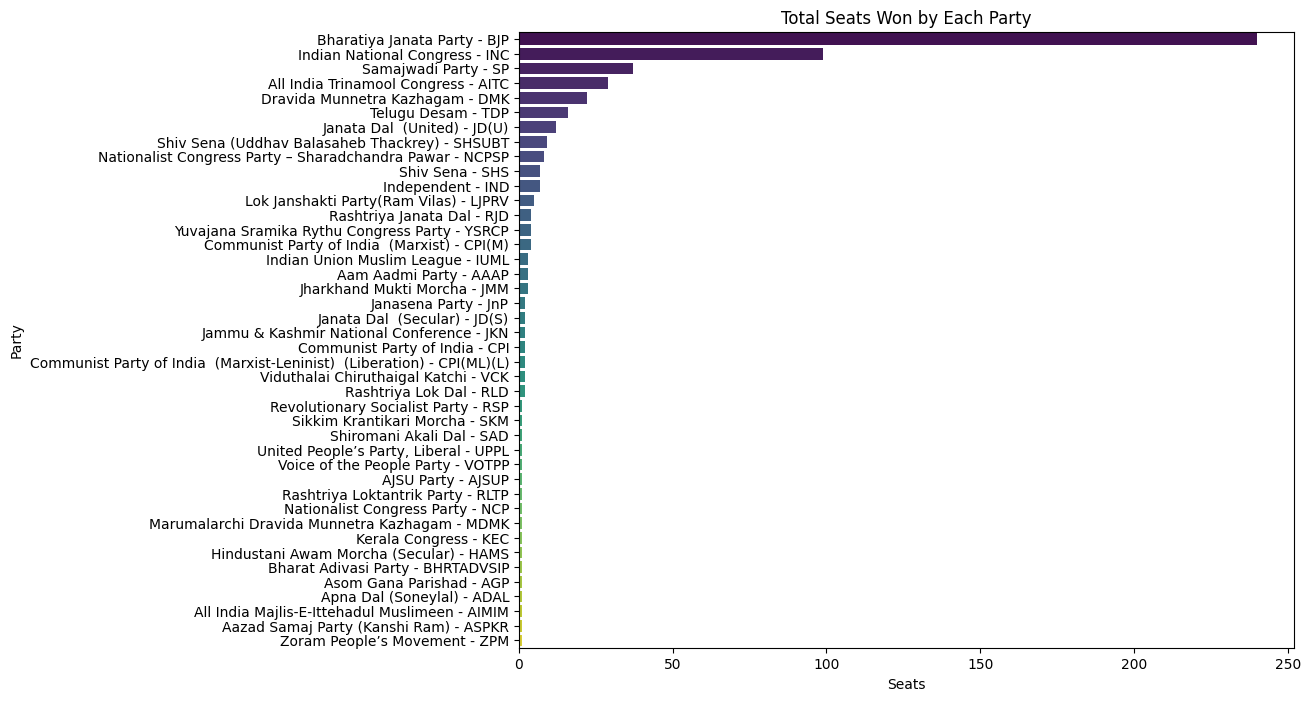

In [152]:


df['Won'] = pd.to_numeric(df['Won'])

party_seats = df.groupby('Party')['Won'].sum().reset_index()

party_seats = party_seats.sort_values(by='Won', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Won', y='Party', data=party_seats, palette='viridis')
plt.title('Total Seats Won by Each Party')
plt.xlabel('Seats')
plt.ylabel('Party')
plt.show()



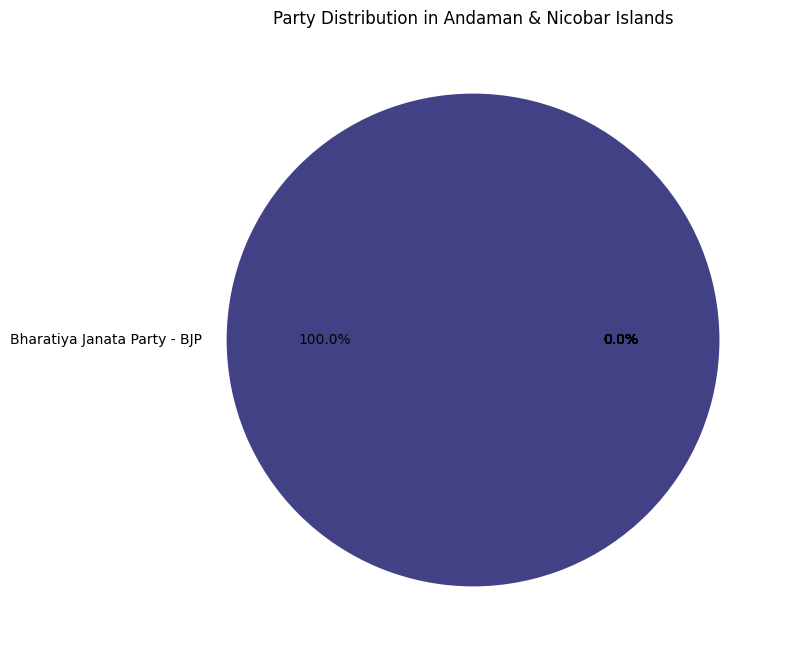

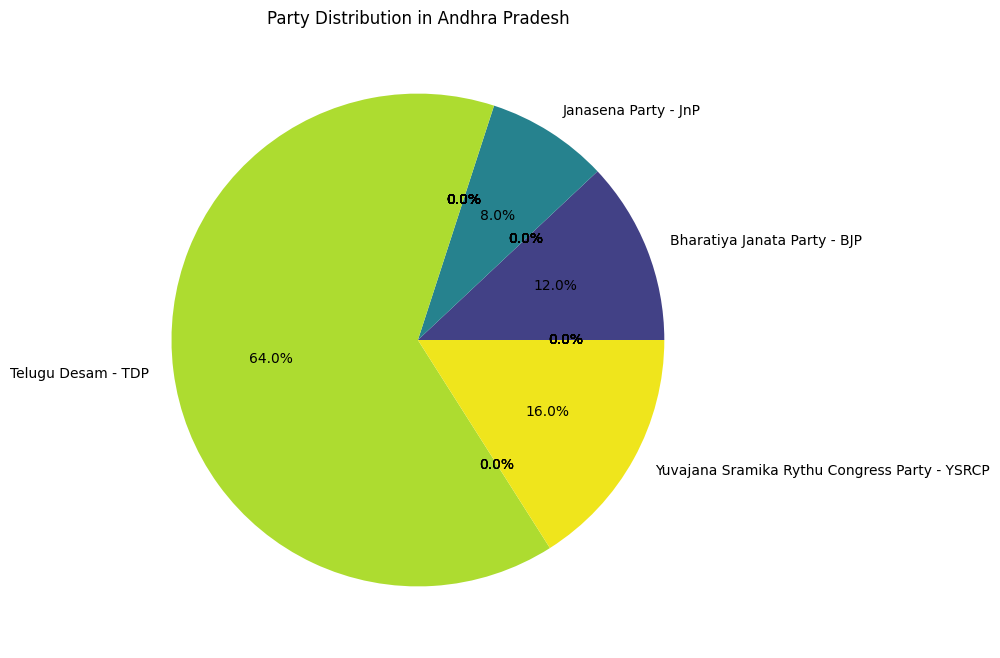

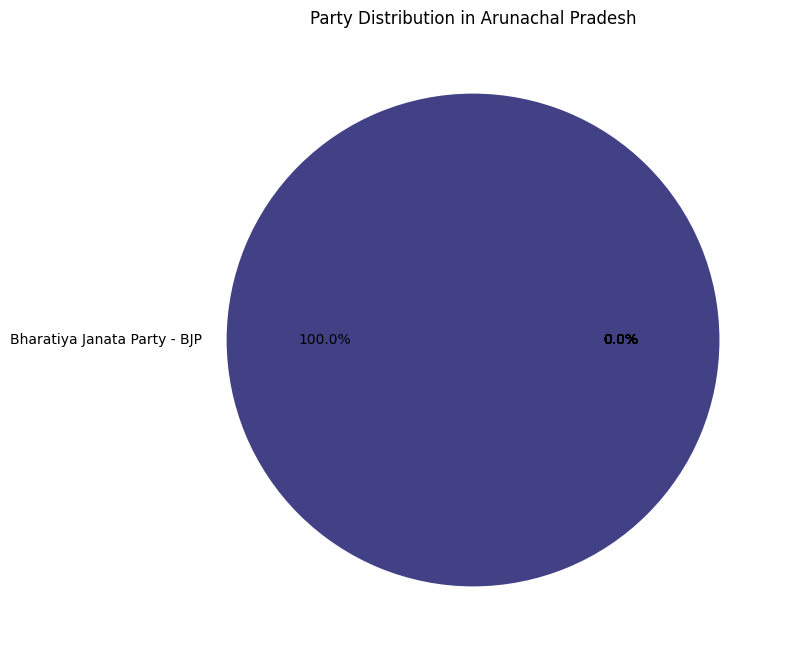

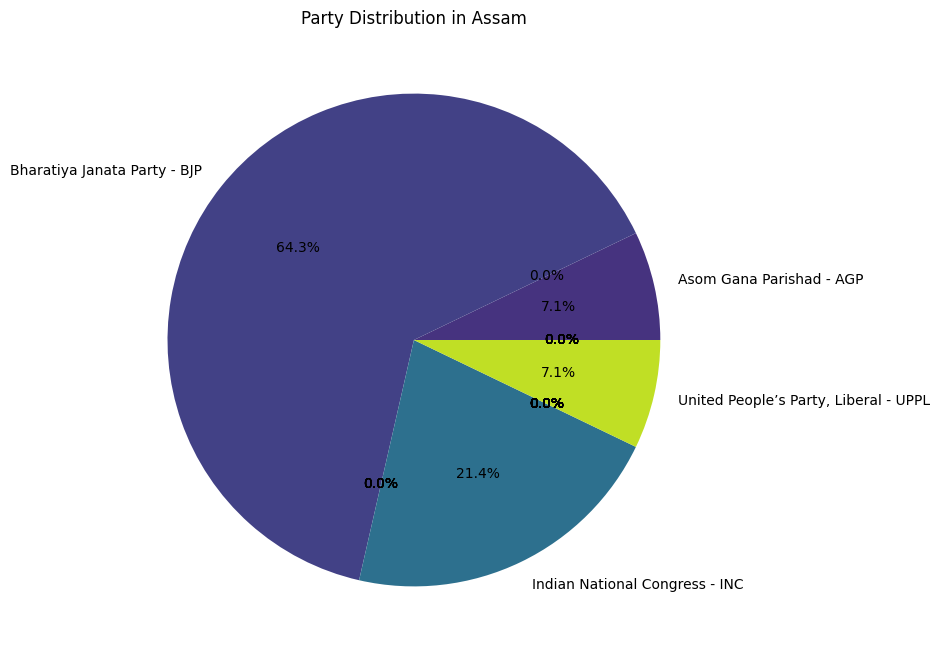

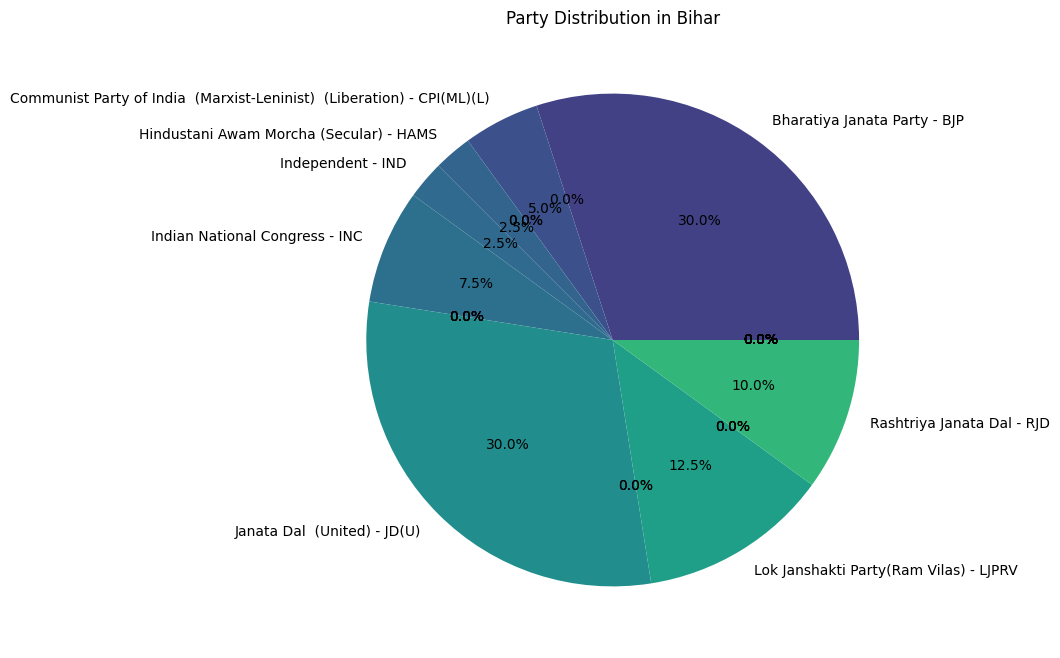

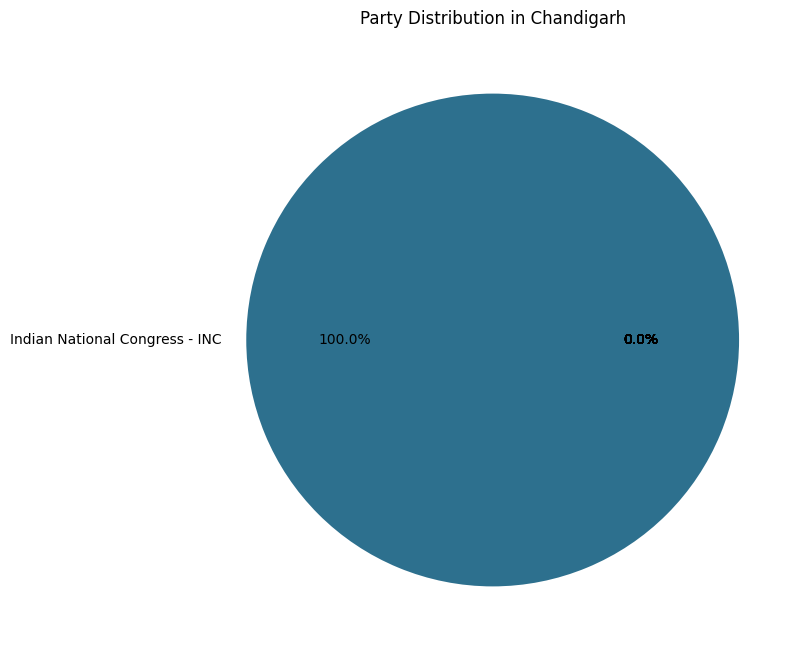

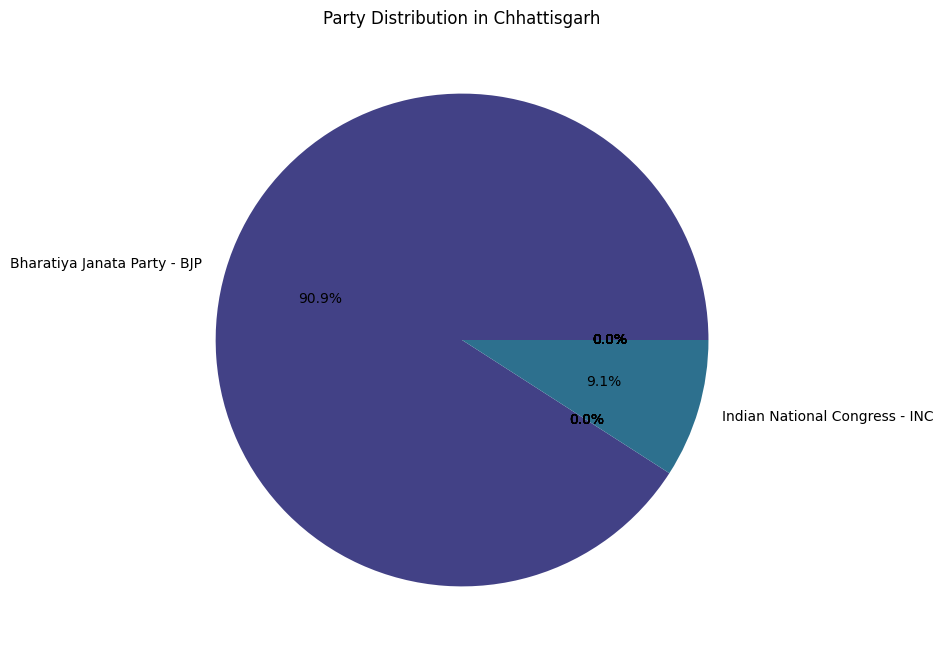

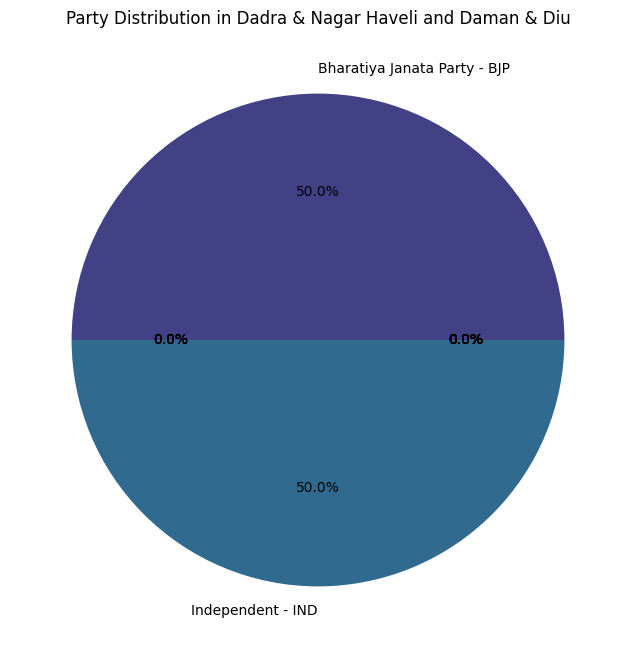

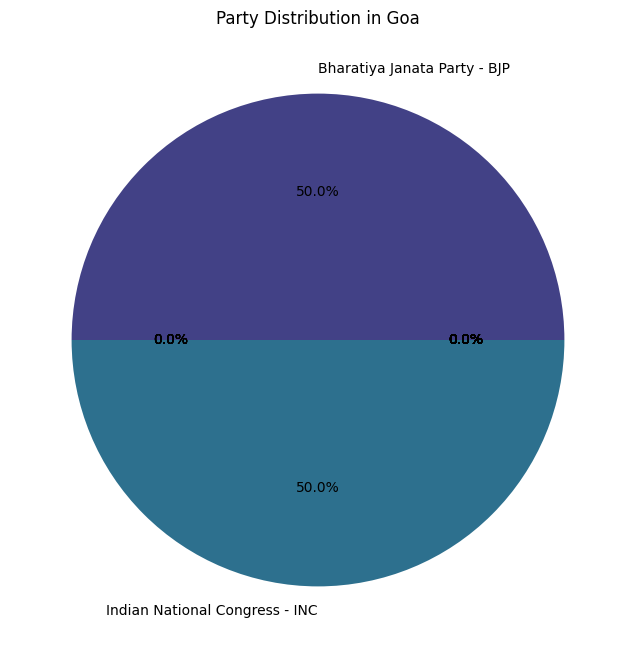

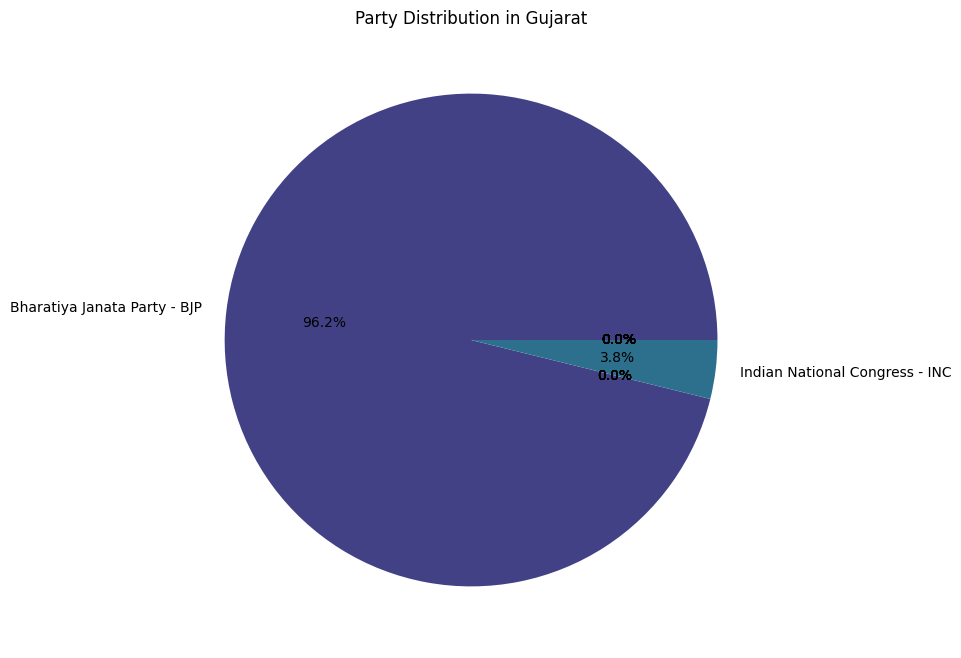

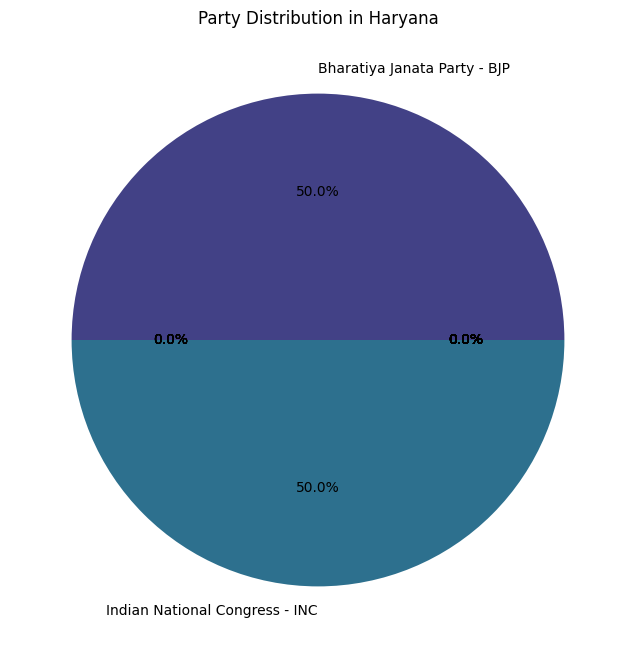

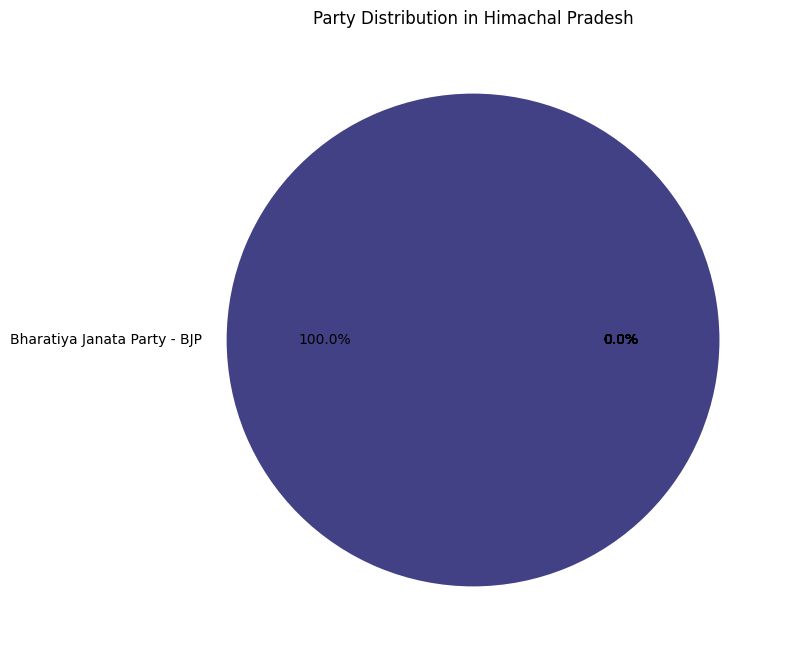

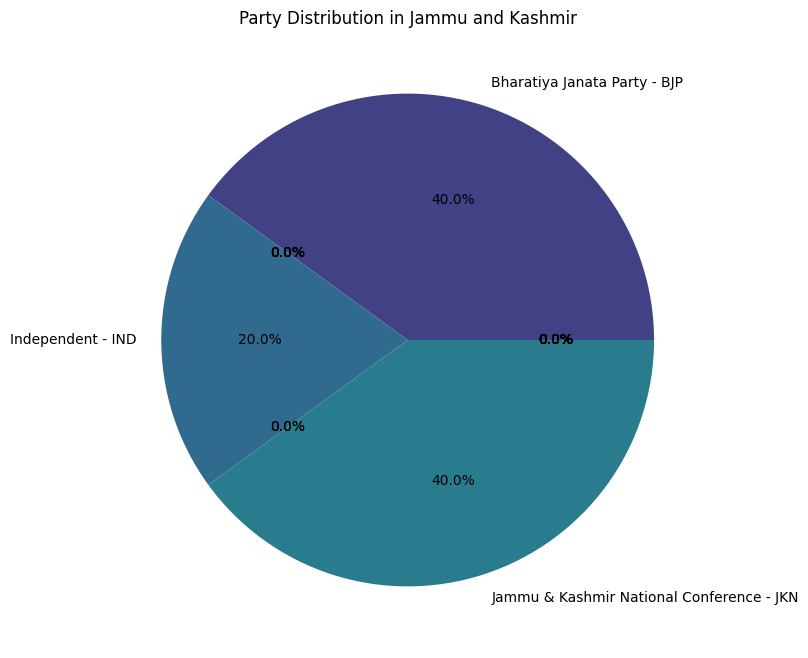

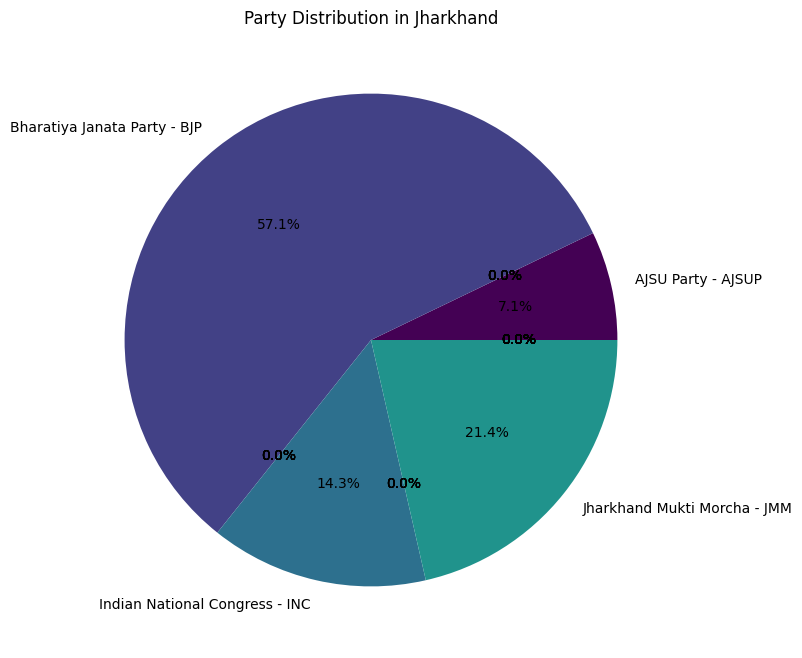

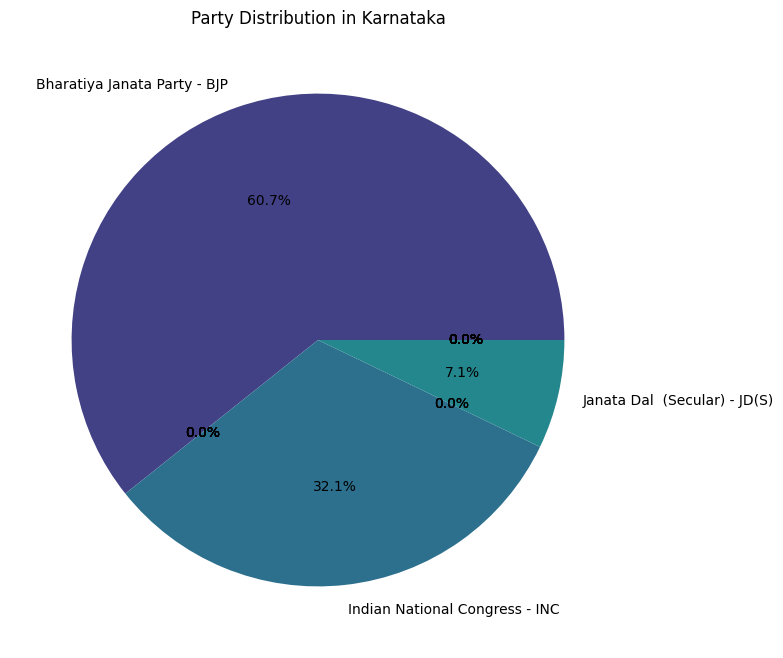

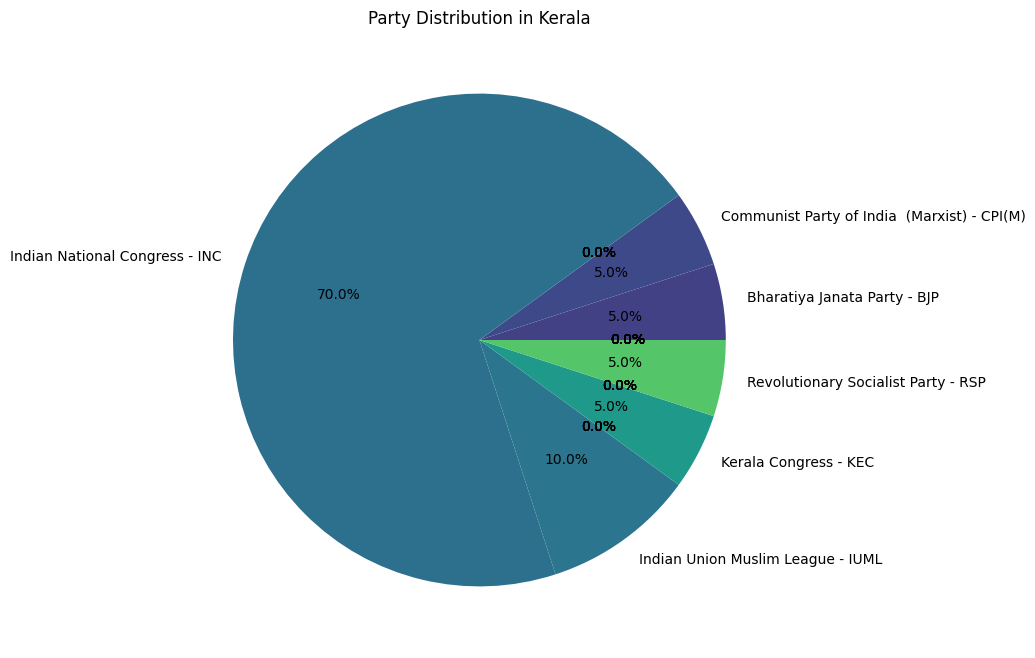

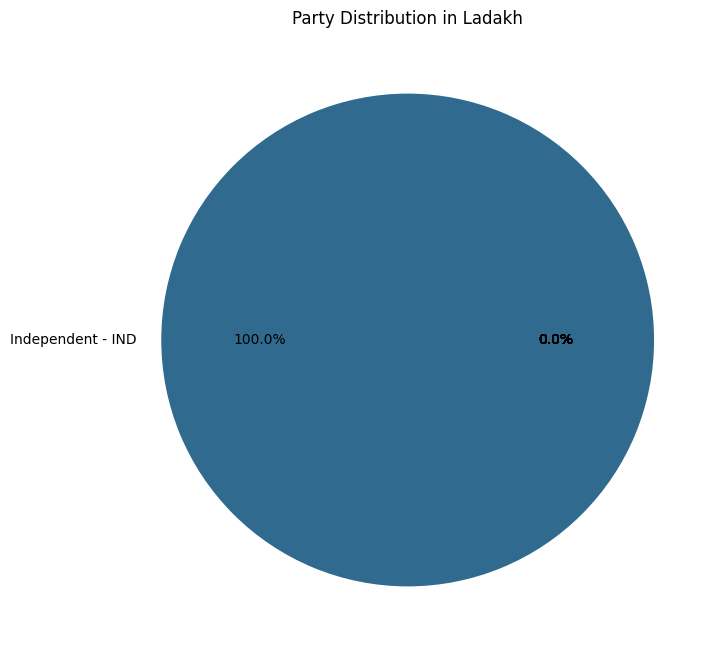

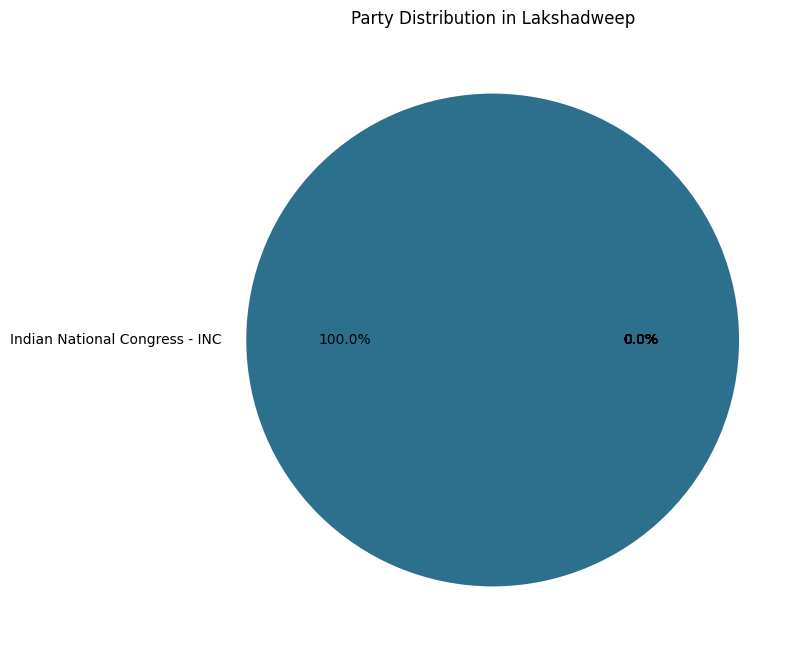

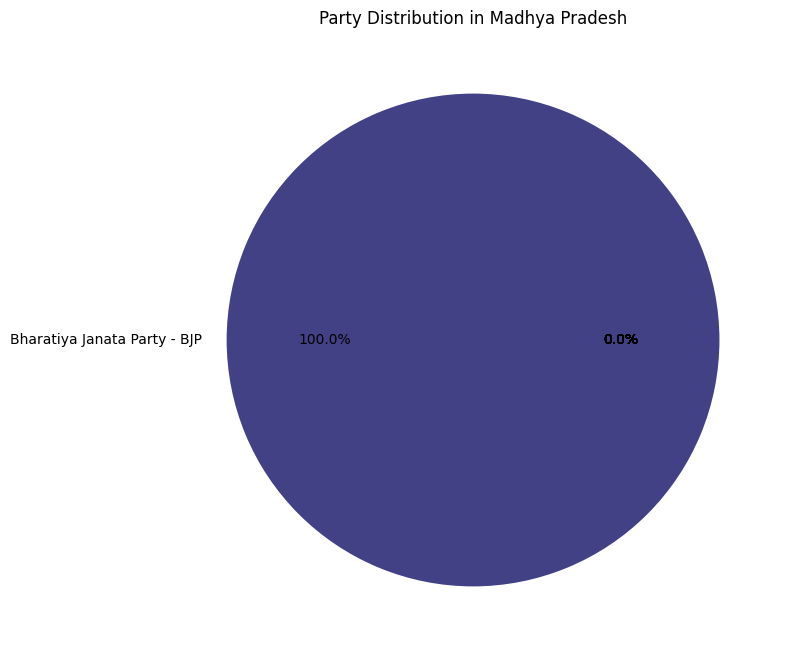

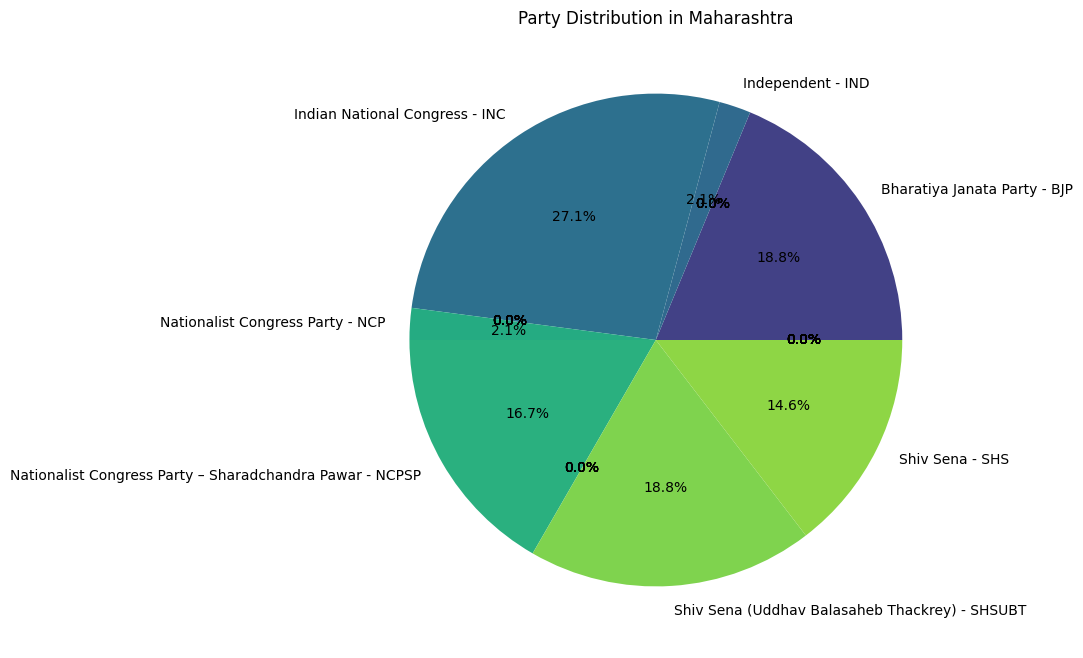

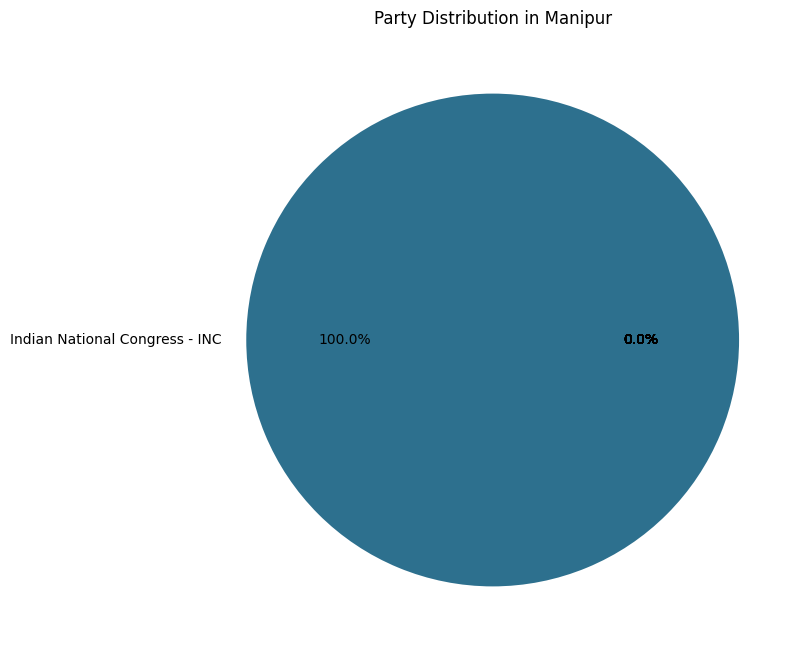

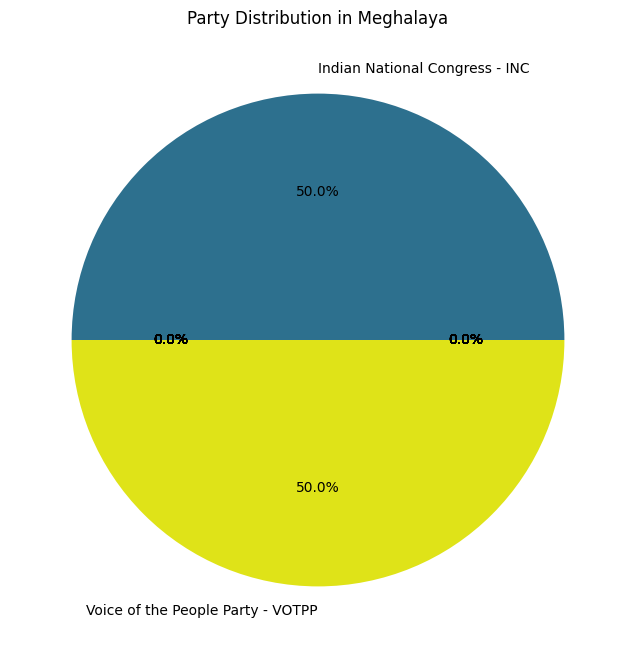

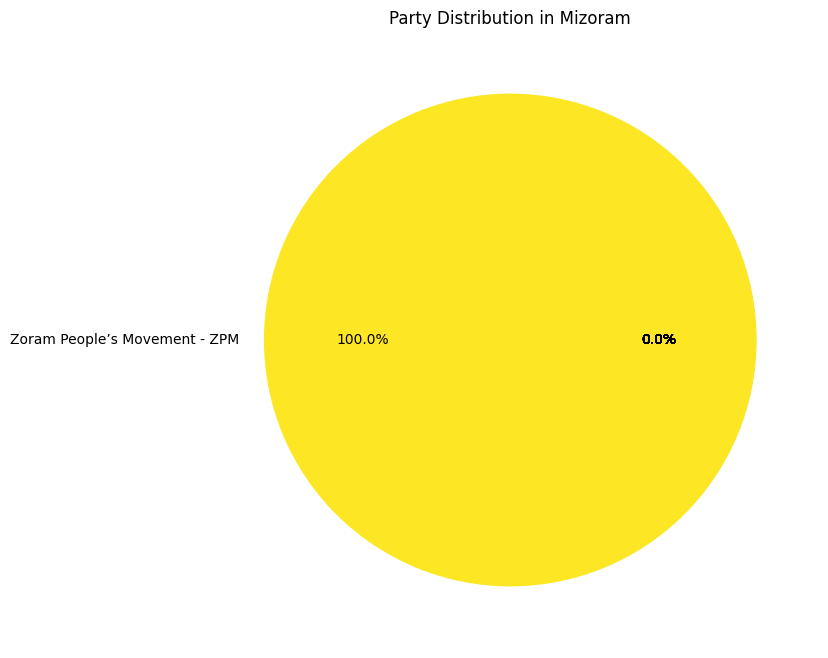

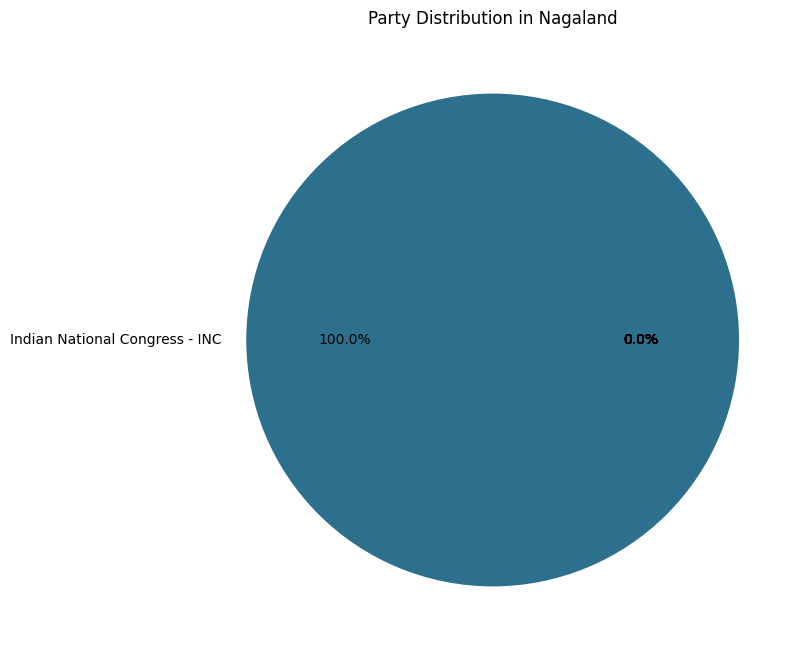

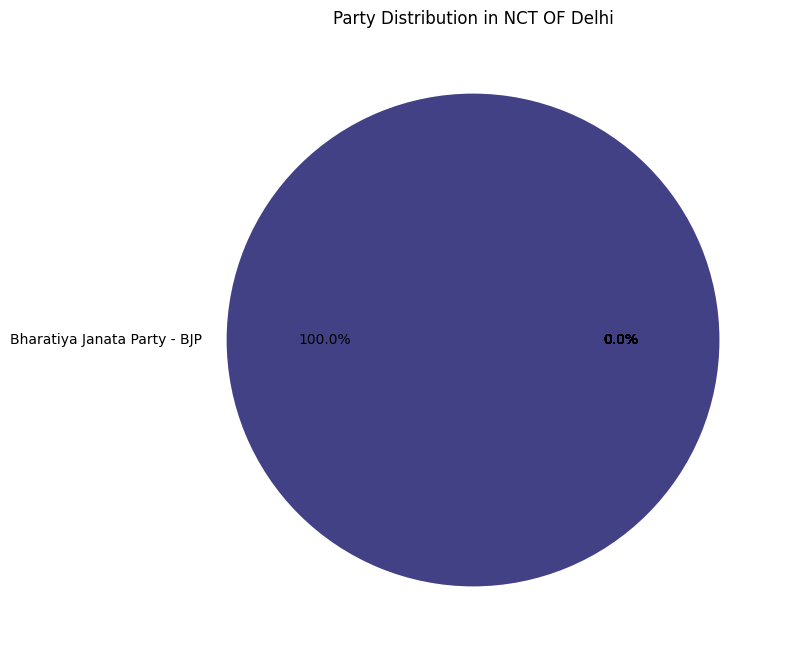

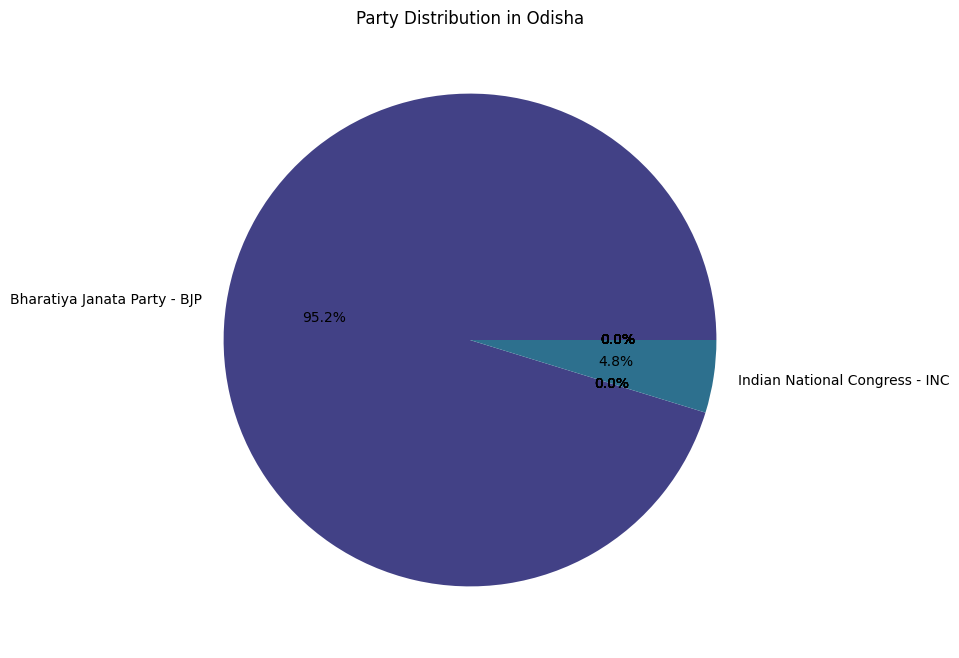

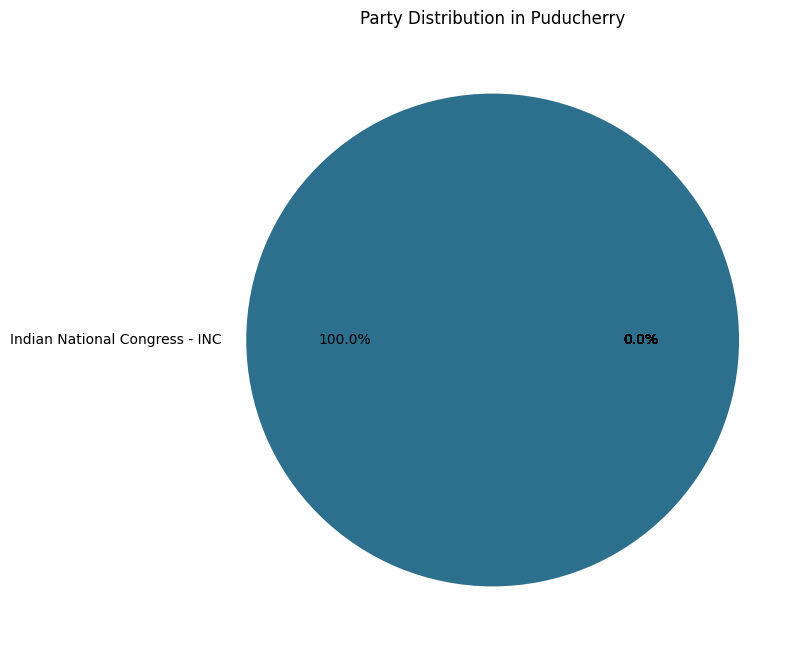

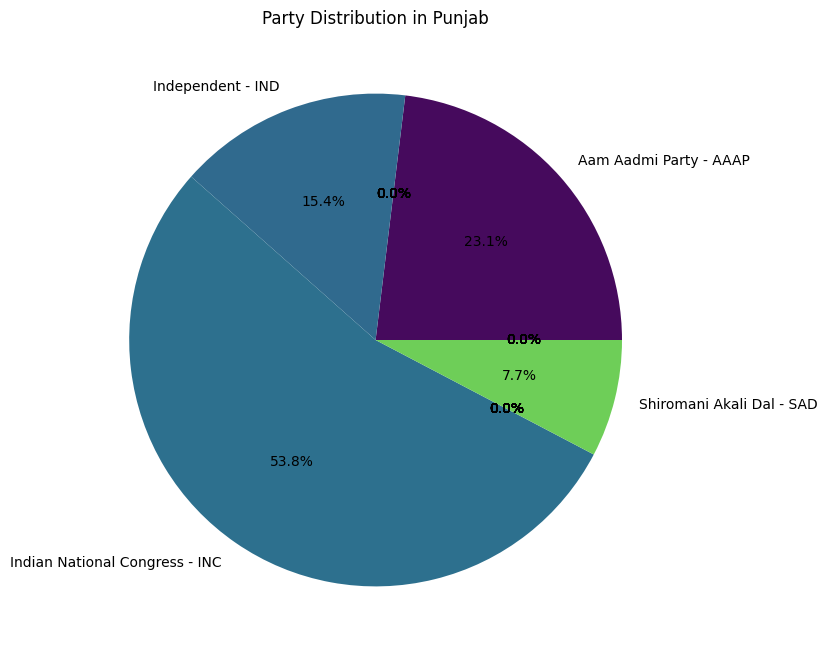

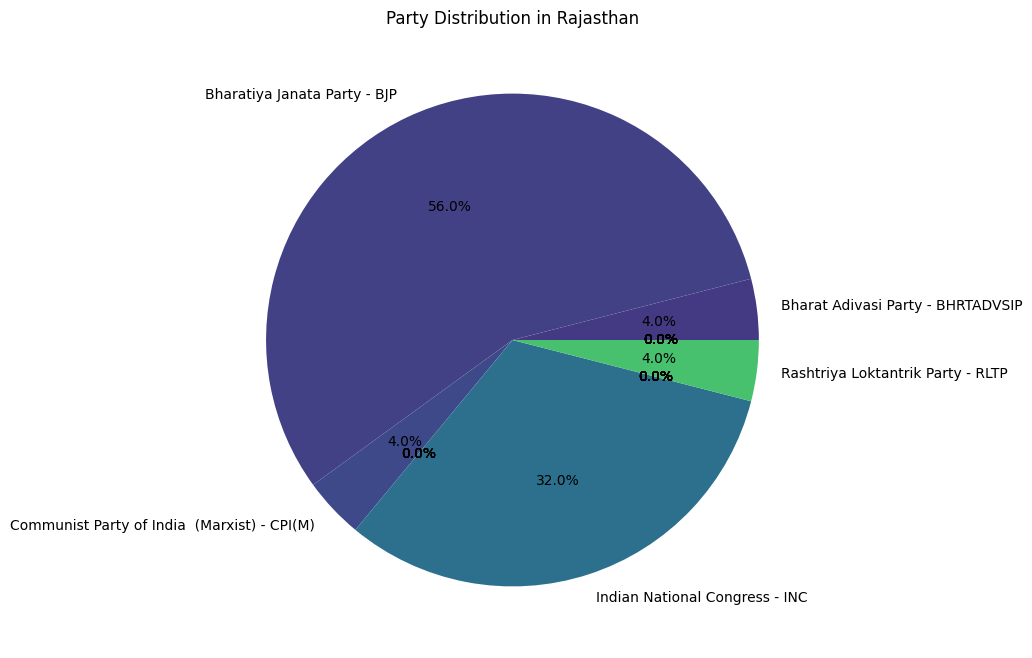

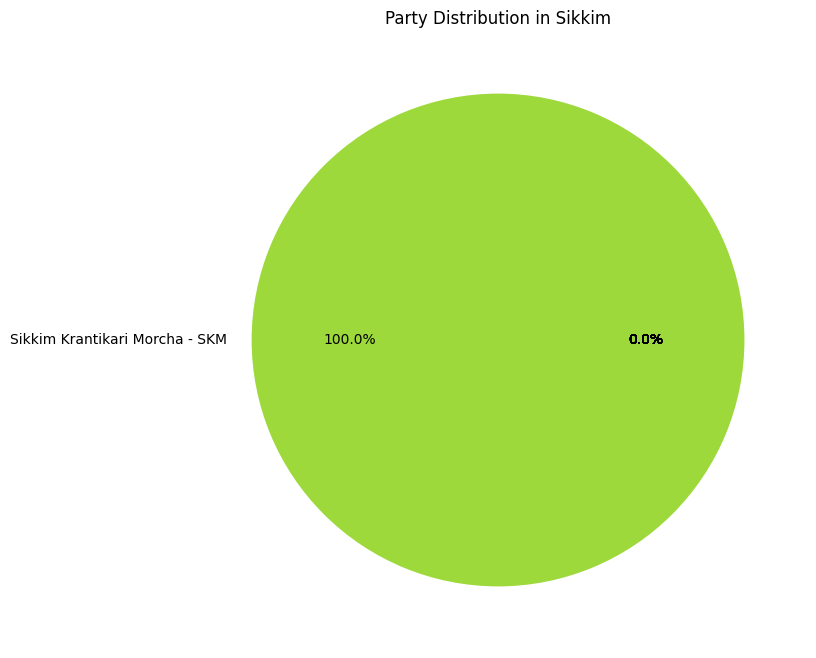

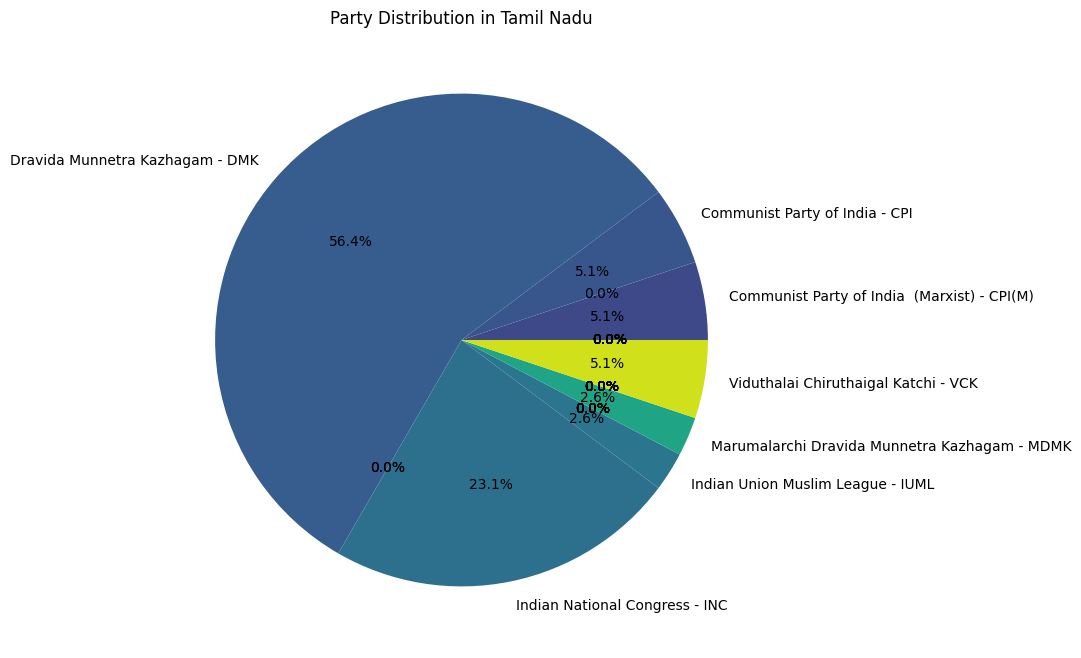

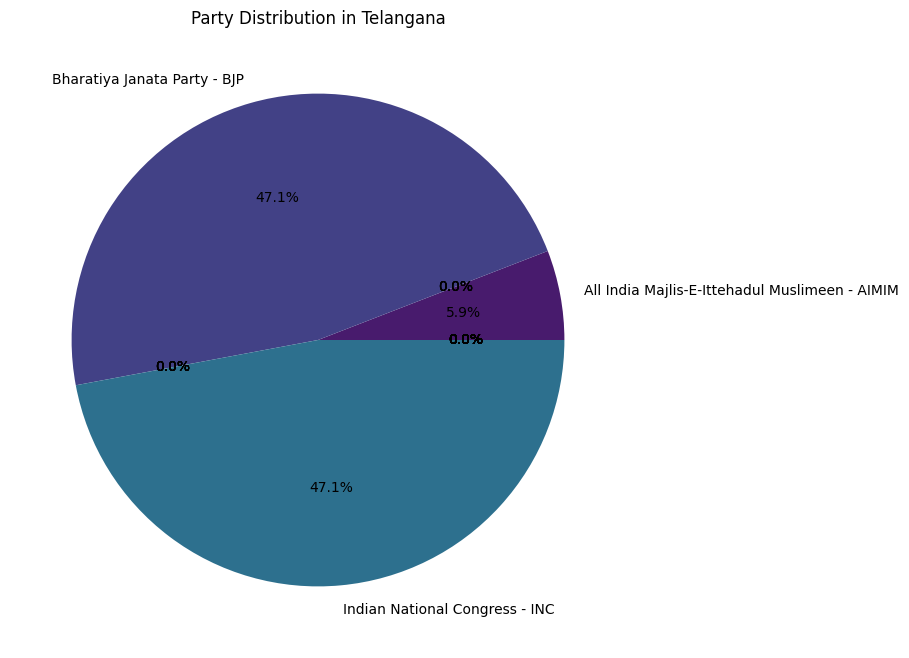

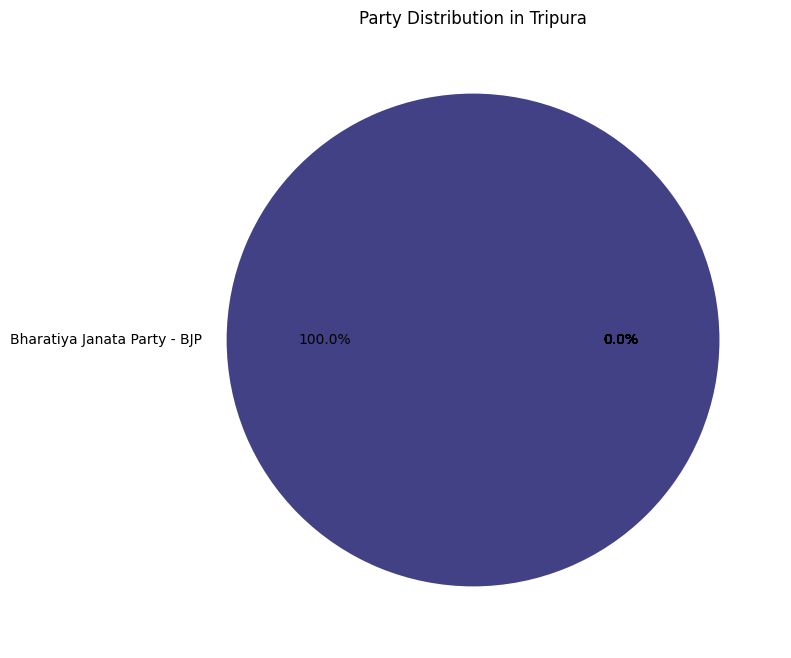

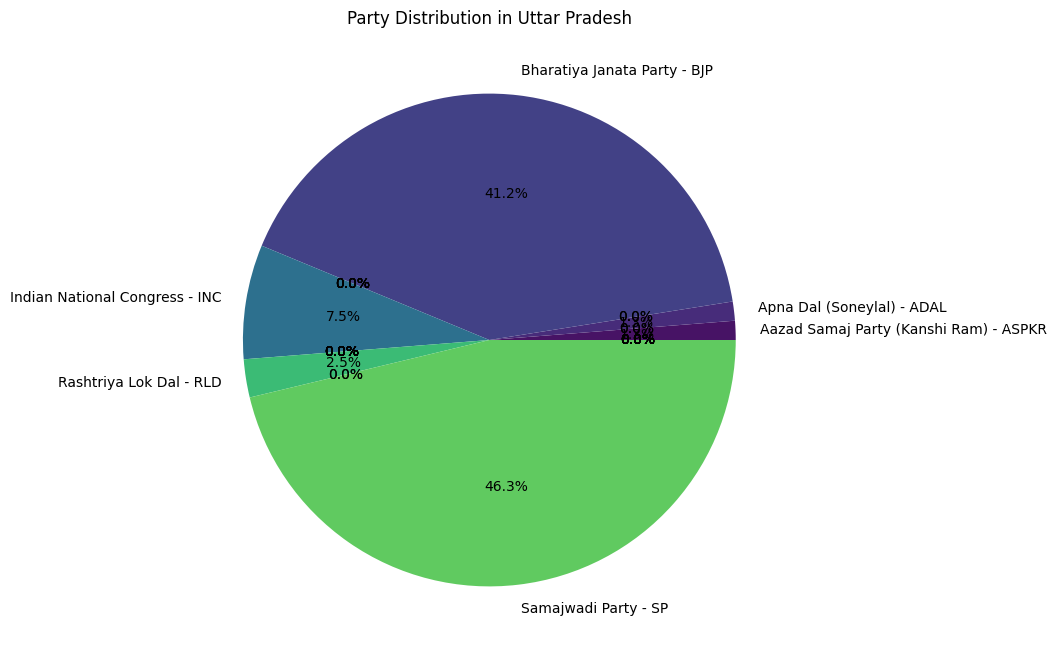

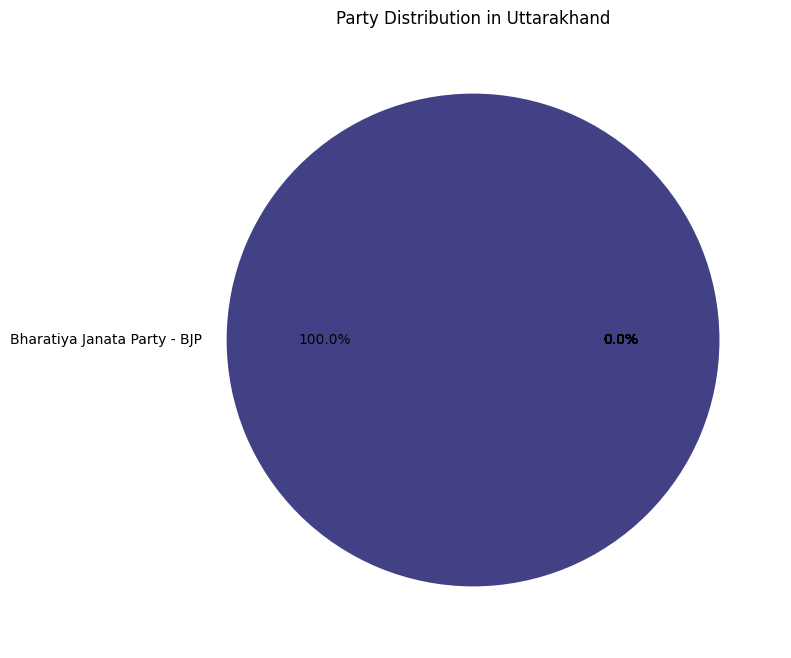

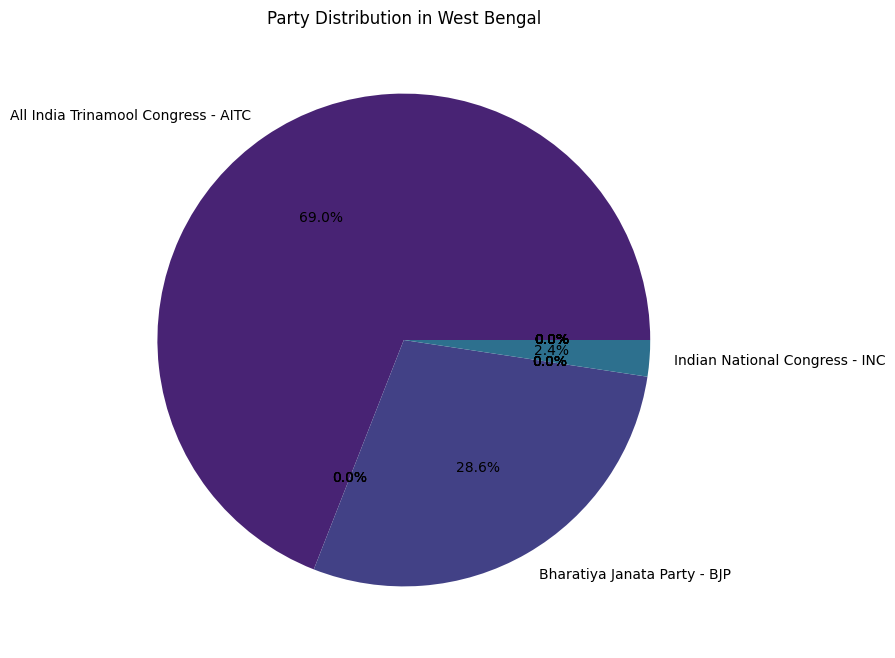

In [153]:
# Group by State to get the total seats won by each party in a state
state_seats = df.groupby(['State', 'Party'])['Won'].sum().unstack().fillna(0)
plt.title("Insights drawn from each state")
# Plot pie chart for a specific state (e.g., Andhra Pradesh)
for i in values:
  state_seats.loc[values[i]].plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), cmap='viridis')
  plt.title(f'Party Distribution in {values[i]}')
  plt.ylabel('')
  plt.show()


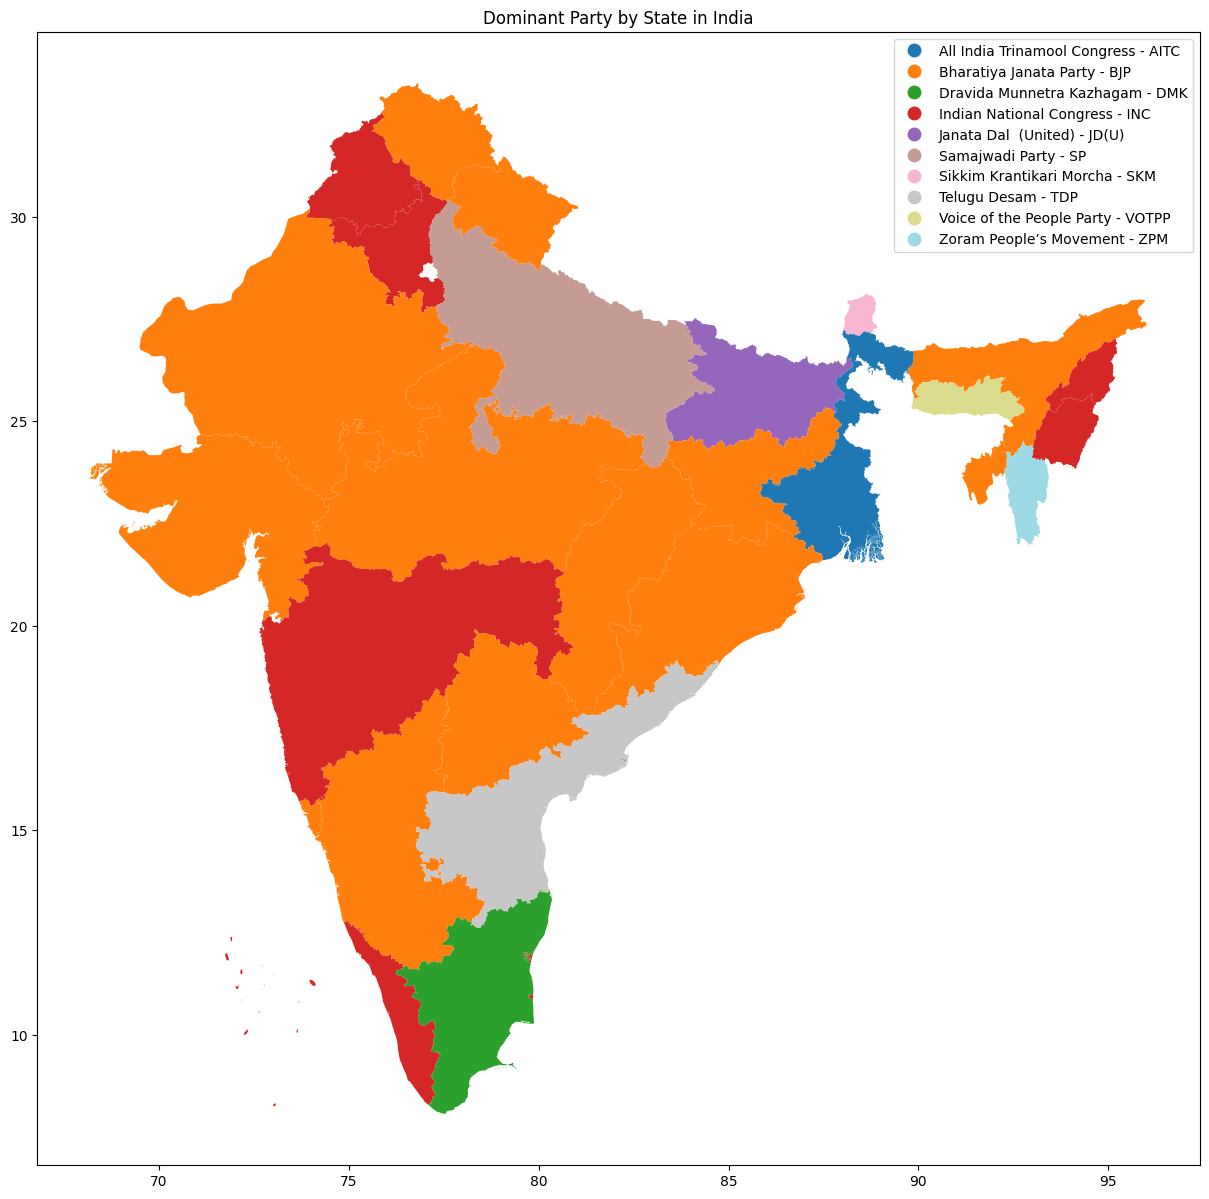

In [154]:
# Load a shapefile of Indian states
gdf = gpd.read_file('/content/Indian_states.shp')

# Create a DataFrame with the dominant party for each state
state_party = df.loc[df.groupby('State')['Won'].idxmax()]

# Merge with the geodataframe
gdf_merged = gdf.merge(state_party[['State', 'Party']], how='left', left_on='st_nm', right_on='State')

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
gdf_merged.plot(column='Party', cmap='tab20', legend=True, ax=ax)
plt.title('Dominant Party by State in India')
plt.show()

